In [1]:
%matplotlib inline

# Problem 2: Maximum Likelihood and Maximum a Posteriori Estimation
n iid $X _{i}, ..., X _{n}$, bernoulli distribution with parameter $\theta$
$$
P(X _{i} = 1) = \theta \; and \; P(X _{i} = 0) = 1 - \theta
$$

We should estimate $\theta$.
## Maximum Likelihood Estimation

$$
\hat{\theta} ^{MLE} = \underset{\hat{\theta}}{argmax} \: L(\hat{\theta}).
$$

(a)

$$
L(\hat{\theta}) = P _{\hat{\theta}} (X _{i}, ..., X _{n}) 
= \prod_{i=1}^{n} P _{\hat{\theta}} (X _{i})
= \prod_{i=1}^{n} \hat{\theta}^{X_{i}} (1 - \hat{\theta})^{1 - X_{i}} 
$$

(b)

In [8]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import operator
import seaborn as sns

np.random.seed(sum(map(ord, 'hm2')))
# list available fonts: [f.name for f in matplotlib.font_manager.fontManager.ttflist]
plt.rc('font', family='DejaVu Sans') 

In [9]:
dataset_6_to_4 = [1] * 6 + [0] * 4
hypothesis = np.linspace(0, 1, 101)

def bernoulli_likelihoods(theta, dataset):
    return functools.reduce(operator.mul, map(lambda value: theta if value else (1.0 - theta), dataset), 1)

In [10]:
experiments = bernoulli_likelihoods(hypothesis, dataset_6_to_4)
theta_hat_index = np.argmax(experiments)
theta_hat = hypothesis[theta_hat_index]
max_value = experiments[theta_hat_index]

print('theta hat = {}'.format(theta_hat))

theta hat = 0.6


draw result

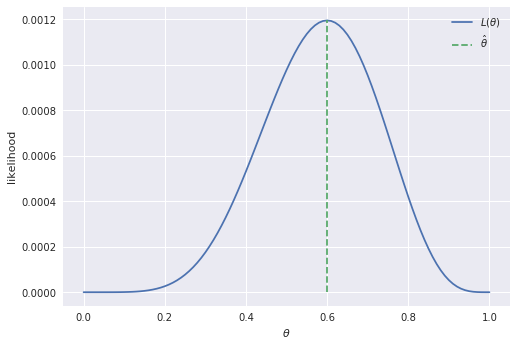

In [11]:
plt.plot(hypothesis, experiments, label=r'$L(\theta)$')
plt.plot((theta_hat, theta_hat), (0.0, max_value), label=r'$\hat{\theta}$', ls='--')
plt.xlabel(r'$\theta$')
plt.ylabel('likelihood')
plt.legend();

(d)

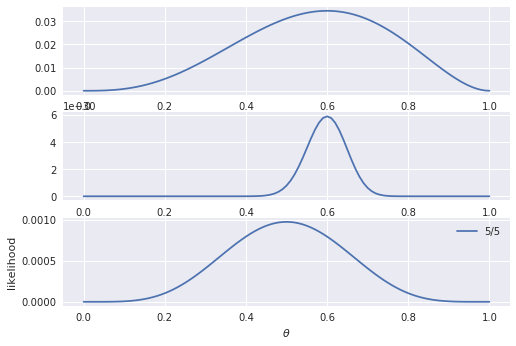

In [20]:
hypothesis = np.linspace(0, 1, 101)

dataset_3_to_2 = [1] * 3 + [0] * 2
dataset_60_to_40 = [1] * 60 + [0] * 40
dataset_5_to_5 = [1] * 5 + [0] * 5

datasets = [{
    'dataset': dataset_3_to_2,
    'name': '3/2', 
}, {
    'dataset': dataset_60_to_40,
    'name': '60/40',
}, {
    'dataset': dataset_5_to_5,
    'name': '5/5'
},
]

for idx, ds in enumerate(datasets):
    experiments = bernoulli_likelihoods(hypothesis, ds['dataset'])
    plt.subplot(len(datasets), 1, idx + 1)
    plt.plot(hypothesis, experiments, label=ds['name'])
    
plt.xlabel(r'$\theta$')
plt.ylabel('likelihood')
plt.legend();